# I. Perkenalan

- Nama: Cylia Wardana

- Batch : HCK-004

### Problem Statement dan Objective

Untuk memprediksi harga taksi online (Uber/Lyft) sesuai dengan keadaan dan kondisi customer yang memesannya (dari sisi jarak tempuh / jenis kendaraan yang ingin digunakan / situasi di jalan / rush hour atau tidak, dan sebagainya)

# II. Import Libraries

In [786]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

#multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model
from sklearn.linear_model import LinearRegression

#evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#save
import joblib

# III. Data Loading

In [787]:
missing_values = ["n/a", "na", "--",'?',' nan', 'no']
data = pd.read_csv('rideshare_kaggle.csv',na_values = missing_values)

Cek non-standard missing value pada dataset (diganti menjadi nan value) + loading data csv

In [788]:
df = data.copy()

In [789]:
pd.set_option("display.max.columns", None)

Menjabarkan semua nama kolom di dataset

In [790]:
df.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [791]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat 55095 missing value pada kolom price (yang akan dijadikan target)

In [792]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Pada tipe data kolom price sudah tidak terdapat non-standard missing value karena tipe data sudah float (bukan string)

In [793]:
df[df['price']==0]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


Memastikan sudah tidak ada data kolom price yang sama dengan 0

In [794]:
df.dropna(subset=['price'],inplace=True)

Menghapus semua missing value di kolom price (karena missing value hanya ada di kolom price dan karena nantinya kolom price akan dijadikan target sehingga sebaiknya missing value dihilangkan di awal saja)

In [795]:
df.price.isnull().sum()

0

Kolom price sudah tidak ada missing value

In [796]:
df.duplicated().sum()

0

Tidak ada data yang duplikasi

# IV. EDA (Exploratory Data Analysis)

In [797]:
df['datetime'] = pd.to_datetime(df['datetime'])

Mengganti tipe data kolom datetime menjadi tipe datetime

In [855]:
df.datetime.describe(datetime_is_numeric=True)

count                           637976
mean     2018-12-05 09:27:37.371437056
min                2018-11-26 00:00:00
25%                2018-11-28 00:00:00
50%                2018-12-02 00:00:00
75%                2018-12-14 00:00:00
max                2018-12-18 00:00:00
Name: datetime, dtype: object

Waktu pengambilan data dari 26 November 2018 sampai 18 Desember 2018

In [799]:
df.cab_type.value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

Tabel diatas menunjukkan bahwa lebih banyak orang yang menggunakan Uber daripada Lyft

<AxesSubplot: title={'center': 'Uber vs Lyft'}, ylabel='cab_type'>

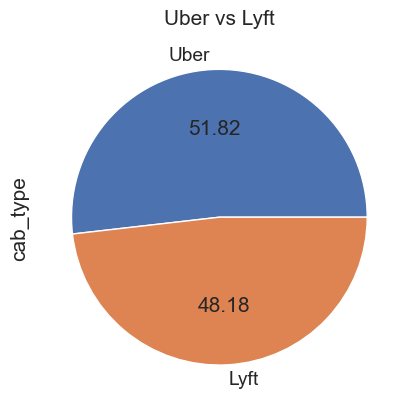

In [800]:
df.cab_type.value_counts().plot(kind='pie', autopct='%.2f', title= 'Uber vs Lyft')

Pengguna Uber (51.82%) lebih banyak daripada Lyft (48.18%)

In [801]:
df.groupby(['cab_type','name'])[['name']].value_counts()

cab_type  name        
Lyft      Lux             51235
          Lux Black       51235
          Lux Black XL    51235
          Lyft            51235
          Lyft XL         51235
          Shared          51233
Uber      Black           55095
          Black SUV       55096
          UberPool        55091
          UberX           55094
          UberXL          55096
          WAV             55096
dtype: int64

Di US terdapat 2 tipe taksi yaitu Lyft dan Uber dimana masing-masing taksi memiliki pilihan untuk jenis-jenis kendaraan yang bisa digunakan (sesuai dengan yang tertera diatas).

In [802]:
df.describe(include='object').T

,count,unique,top,freq
id,637976,637976,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
timezone,637976,1,America/New_York,637976
source,637976,12,Financial District,54197
destination,637976,12,Financial District,54192
cab_type,637976,2,Uber,330568
product_id,637976,12,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,637976,12,UberXL,55096
short_summary,637976,9,Overcast,201429
long_summary,637976,11,Mostly cloudy throughout the day.,186262
icon,637976,7,cloudy,201429


In [803]:
df.source.unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [804]:
df.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

Ini menandakan bahwa tempat tujuan dan tempat destinasi yang dapat diantarkan oleh Uber maupun Lyft hanya 12 tempat saja (Haymarket Square, Back Bay, North End, North Station, Beacon Hill, Boston University, Fenway, South Station, Theatre District, West End, Financial District, Northeastern University)

In [805]:
df.groupby('hour')[['id']].count().sort_values('id',ascending=False).head()

,id
hour,
0,29872
23,29355
17,28075
12,28017
13,27977


Jam 12 malam merupakan jam dimana orang-orang paling sering memesan taksi online

In [806]:
df.day.value_counts(ascending=False)

27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: day, dtype: int64

- Orang paling banyak menggunakan jasa taksi online pada tanggal 27 November 2018
- Tercatat angka yang rendah pada 9 dan 10 Desember 2018 yaitu 1529 dan 2534

In [807]:
tgl_9des = df[df['day']== 9]
tgl_9des.hour.unique()

array([23])

In [808]:
tgl_10des =df[df['day']== 10]
tgl_10des.hour.unique()

array([2, 0, 1])

Untuk tanggal 9 dan 10 Desember dapat terjadi karena data yang tercatat hanya pada jam tertentu saja dimana pada tanggal 9 Desember yang tercatat hanya ada data jam 11 malam, sedangkan tanggal 10 Desember hanya tercatat data dari jam 12-2 malam

(array([17860., 17864., 17866., 17870., 17874., 17878., 17882.]),
 [Text(17860.0, 0, '2018-11-25'),
  Text(17864.0, 0, '2018-11-29'),
  Text(17866.0, 0, '2018-12-01'),
  Text(17870.0, 0, '2018-12-05'),
  Text(17874.0, 0, '2018-12-09'),
  Text(17878.0, 0, '2018-12-13'),
  Text(17882.0, 0, '2018-12-17')])

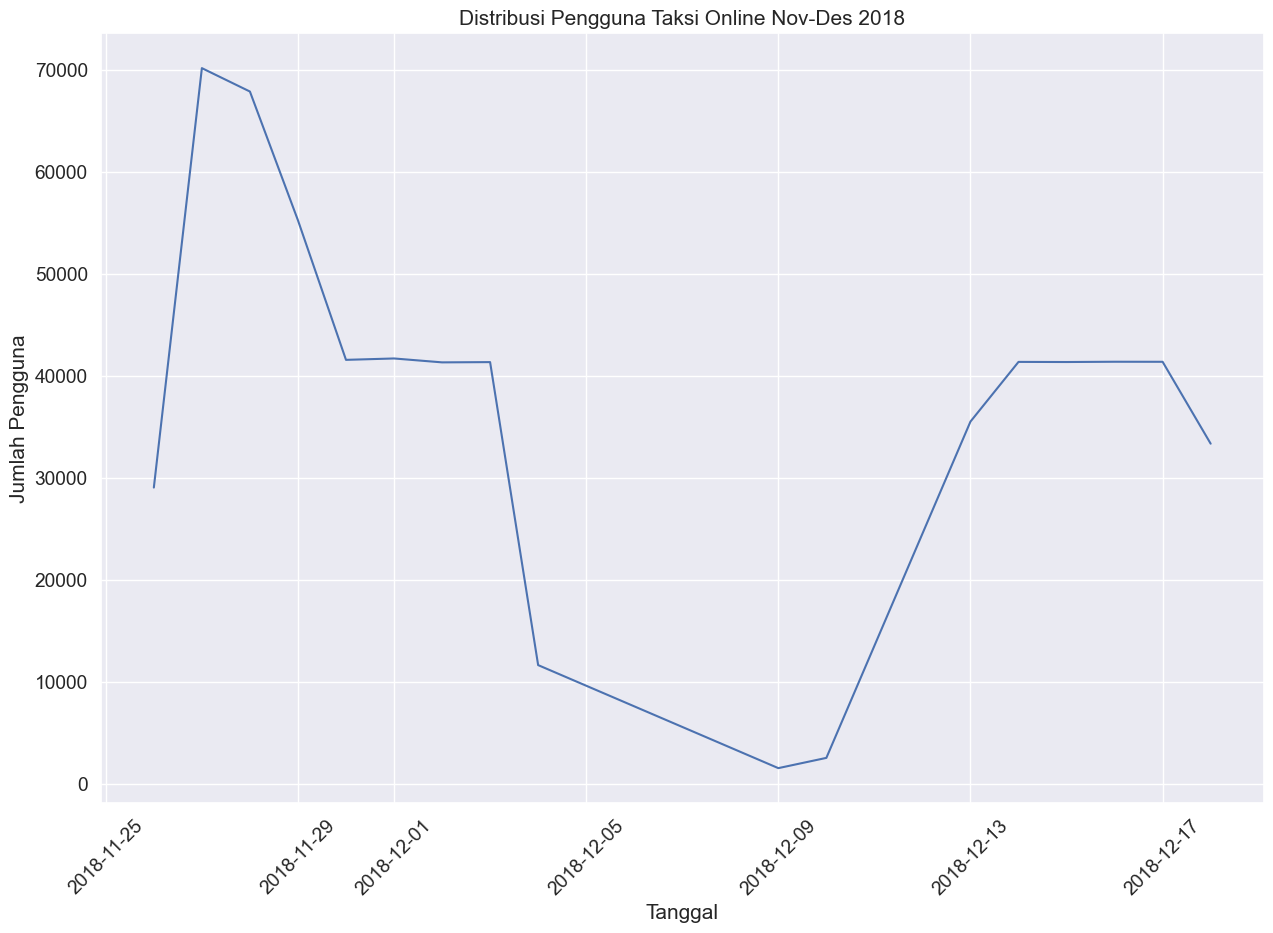

In [809]:
df['datetime']=pd.to_datetime(df['datetime']).dt.date  #tipe data kolom datetime menjadi object kembali, untuk kebutuhan line plot dibawah
df.datetime.value_counts().plot(kind='line',figsize=(15,10),title='Distribusi Pengguna Taksi Online Nov-Des 2018',xlabel='Tanggal',ylabel='Jumlah Pengguna')
plt.xticks(rotation=45)

In [810]:
df.groupby('cab_type')[['distance']].aggregate(['mean','sum','min','max'])

distance                       
              mean        sum   min   max
cab_type                                 
Lyft      2.186976  672293.79  0.39  6.33
Uber      2.191386  724402.25  0.02  7.86

Rata-rata jarak yang ditempuh Lyft dan Uber adalah 2.18 km dan 2.19 km secara berurutan

In [811]:
df[df['distance']==0.39].head(1)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
631,778e4e25-694a-4c1f-b156-b5578a07ac11,1.543328e+09,14,27,11,2018-11-27,America/New_York,Financial District,South Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,10.5,0.39,1.0,42.3429,-71.1003,42.01,37.66,Overcast,Light rain in the morning.,0.0015,0.32,0.91,6.82,7.56,1543338000,4.394,46.24,1543320000,33.6,1543399200,43.32,1543320000,30.08,1543399200,cloudy,39.68,988.3,237,1.0,1,4.394,329.4,1543319476,1543353358,0.68,0.143,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000


Jarak terpendek yang ditempuh Lyft yaitu 0.39 km yaitu dari Financial District sampai South Station

In [812]:
df[df['distance']==0.02].head(1)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
11272,59a283a6-b0d9-42ef-99b1-dc5c1d238113,1.543423e+09,16,28,11,2018-11-28,America/New_York,South Station,Theatre District,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.5,0.02,1.0,42.3661,-71.0631,41.16,35.84,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.61,8.33,12.76,1543431600,10.0,42.6,1543438800,37.44,1543489200,36.58,1543438800,31.97,1543478400,partly-cloudy-day,28.91,991.41,297,0.81,1,10.0,352.0,1543405938,1543439718,0.72,0.0,1543420800,33.75,1543399200,42.6,1543438800,29.97,1543399200,36.58,1543438800


Jarak terpendek yang ditempuh Uber yaitu 0.02 km yaitu dari South Station sampai Theatre District

In [813]:
df[df['distance']==6.33].head(1)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
58963,2b52aaf5-0288-414c-8d86-72cd47db7ba6,1.545102e+09,2,18,12,2018-12-18,America/New_York,Financial District,Fenway,Lyft,lyft,Lyft,16.5,6.33,1.0,42.3519,-71.0643,37.06,31.82,Mostly Cloudy,Light rain in the morning.,0.0,0.0,0.69,6.65,11.71,1545022800,9.88,41.42,1545076800,23.89,1545138000,35.95,1545076800,11.83,1545134400,partly-cloudy-night,27.91,1001.12,279,0.68,0,9.88,369.3,1545048558,1545081262,0.33,0.0178,1545066000,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800


Jarak terjauh yang ditempuh Lyft yaitu 6.33 km yaitu dari Financial District ke Fenway

In [814]:
df[df['distance']==7.86].head(1)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
658723,03832272-f604-4c54-845a-b55387703959,1.545063e+09,16,17,12,2018-12-17,America/New_York,Northeastern University,Financial District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,17.5,7.86,1.0,42.3505,-71.1054,37.62,32.77,Overcast,Light rain in the morning.,0.0,0.0,0.88,6.22,7.24,1545022800,8.54,41.44,1545076800,24.05,1545134400,36.09,1545076800,12.3,1545134400,cloudy,34.53,1001.67,309,1.0,1,8.54,327.0,1545048567,1545081273,0.33,0.0217,1545066000,34.22,1545044400,41.44,1545076800,28.61,1545044400,36.09,1545076800


Jarak terjauh yang ditempuh Uber yaitu 7.86 km yaitu dari Northeastern University ke Financial District 

In [815]:
df.groupby('cab_type')[['price']].aggregate(['mean','min','max'])

price           
               mean  min   max
cab_type                      
Lyft      17.351396  2.5  97.5
Uber      15.795343  4.5  89.5

Terlihat untuk Lyft (17 dollar) memiliki rata-rata harga / price range yang lebih mahal daripada Uber (15 dollar)

<AxesSubplot: xlabel='distance', ylabel='price'>

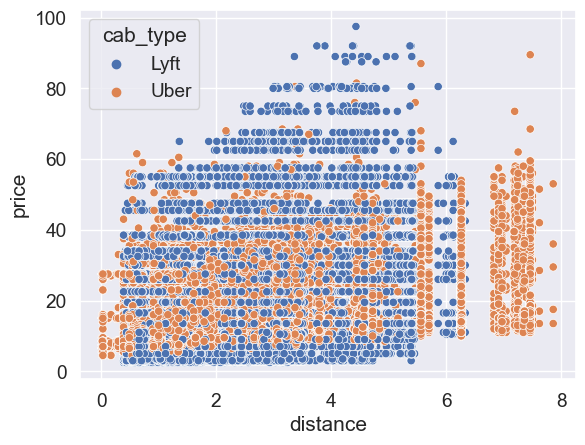

In [816]:
sns.scatterplot(data=df, x='distance', y='price', hue='cab_type', palette='deep')

- Secara keseluruhan, Lyft mengenakan biaya lebih mahal daripada Uber
- Jarak yang sama: harga Lyft > harga Uber
- Uber: Semakin jauh jarak destinasi, semakin mahal

In [817]:
df.groupby(['cab_type','name'])['price'].mean()

cab_type  name        
Lyft      Lux             17.771240
          Lux Black       23.062468
          Lux Black XL    32.324086
          Lyft             9.610885
          Lyft XL         15.309363
          Shared           6.029893
Uber      Black           20.523786
          Black SUV       30.286763
          UberPool         8.752500
          UberX            9.765074
          UberXL          15.678144
          WAV              9.765019
Name: price, dtype: float64

- Tipe kendaraan paling mahal di Lyft : Lux Black XL
- Tipe kendaraan paling mahal di Uber : Black SUV

In [818]:
df.groupby(['cab_type','short_summary'])[['price']].mean().sort_values('price',ascending=True)

price
cab_type short_summary                
Uber      Foggy              15.640326
          Clear              15.717256
          Partly Cloudy      15.773583
          Drizzle            15.774903
          Overcast           15.798112
          Possible Drizzle   15.808930
          Rain               15.828894
          Light Rain         15.841686
          Mostly Cloudy      15.842580
Lyft      Possible Drizzle   17.239823
          Rain               17.312022
          Clear              17.314370
          Overcast           17.322030
          Light Rain         17.335067
          Drizzle            17.346191
          Partly Cloudy      17.384013
          Mostly Cloudy      17.406237
          Foggy              17.506247

- Terlihat dari tabel diatas bahwa cuaca tidak terlalu berpengaruh pada harga rata-rata taksi online (Uber/Lyft)
- Lyft memang mematok harga lebih mahal secara keseluruhan daripada Uber

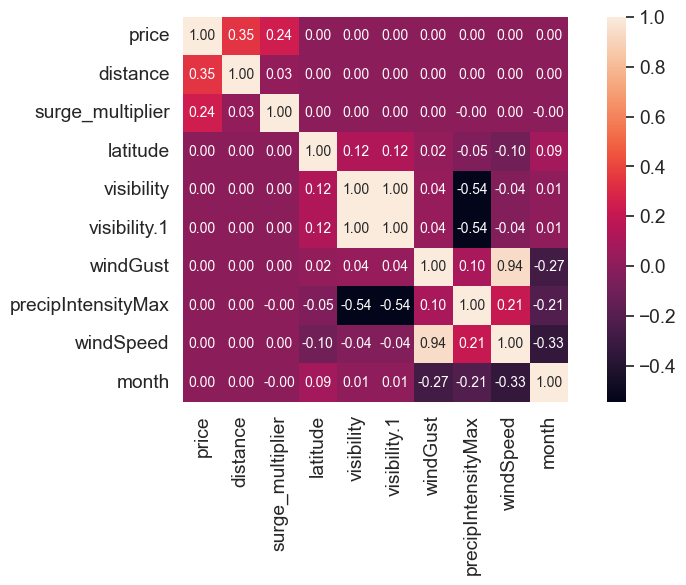

In [819]:
#melihat korelasi antara kolom price dengan kolom numerik lainnya
k=10
plt.figure(figsize=(10,5))
cols = df.corr(numeric_only = True).nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [820]:
df.corr(numeric_only = True).nlargest(10, 'price')['price']

price                 1.000000
distance              0.345061
surge_multiplier      0.240458
latitude              0.002088
visibility            0.001497
visibility.1          0.001497
windGust              0.001218
precipIntensityMax    0.001114
windSpeed             0.000990
month                 0.000913
Name: price, dtype: float64

Membuat heatmap untuk melihat korelasi antara kolom price dengan kolom numerik lainnya dimana kolom price terlihat paling besar berkolerasi dengan kolom distance dan kolom surge_multiplier sehingga kolom-kolom tersebut dapat dipilih menjadi salah satu fitur (kolom distance & surge_multiplier)

In [821]:
df.surge_multiplier.value_counts()

1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

Terlihat untuk kolom surge_multiplier, dimana price/harga yang dikalikan dengan 1 jumlah populasinya paling banyak, sedangkan terdapat 12 customer yang price nya dikalikan dengan 3 yang berarti price yang harus dibayar lebih mahal tiga kali lipat dari harga biasanya

In [822]:
#melihat korelasi antara kolom surge_multiplier dengan kolom lainnya
df.corr(numeric_only = True).nlargest(5, 'surge_multiplier')['surge_multiplier']

surge_multiplier    1.000000
price               0.240458
distance            0.025946
ozone               0.003456
windSpeed           0.002593
Name: surge_multiplier, dtype: float64

Tidak terdapat korelasi antara kolom surge_multiplier dengan kolom lainnya (selain kolom price) berarti untuk dataset ini kita tidak bisa mengetahui faktor apa saja mempengaruhi surge_multiplier

In [823]:
#langkah-langkah untuk melihat korelasi antara kolom price dan kolom kategori
encoded_df = df.copy()

In [824]:
cat_cols = ['price','source','destination','cab_type','name','short_summary']  #asumsi: fitur dari kolom kategori yang sekiranya bisa dipakai
encoded_df[cat_cols].head(3)

,price,source,destination,cab_type,name,short_summary
0,5.0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy
1,11.0,Haymarket Square,North Station,Lyft,Lux,Rain
2,7.0,Haymarket Square,North Station,Lyft,Lyft,Clear


In [825]:
lab = LabelEncoder()

encoded_df['source'] = lab.fit_transform(encoded_df['source'])
encoded_df['destination'] = lab.fit_transform(encoded_df['destination'])
encoded_df['cab_type'] = lab.fit_transform(encoded_df['cab_type'])
encoded_df['name'] = lab.fit_transform(encoded_df['name'])
encoded_df['short_summary'] = lab.fit_transform(encoded_df['short_summary'])

Mengganti kolom kategori menjadi numerik dengan melakukan encode (LabelEncoder) agar bisa dilakukan korelasi

In [826]:
encoded_df[cat_cols]

,price,source,destination,cab_type,name,short_summary
0,5.0,5,7,0,7,4
1,11.0,5,7,0,2,8
2,7.0,5,7,0,5,0
3,26.0,5,7,0,4,0
4,9.0,5,7,0,6,6
...,...,...,...,...,...,...
693065,9.5,11,6,1,11,6
693066,13.0,11,6,1,10,6
693067,9.5,11,6,1,9,6
693069,27.0,11,6,1,1,6


Data string di kolom kategori sudah di-encode (berubah menjadi angka numerik)

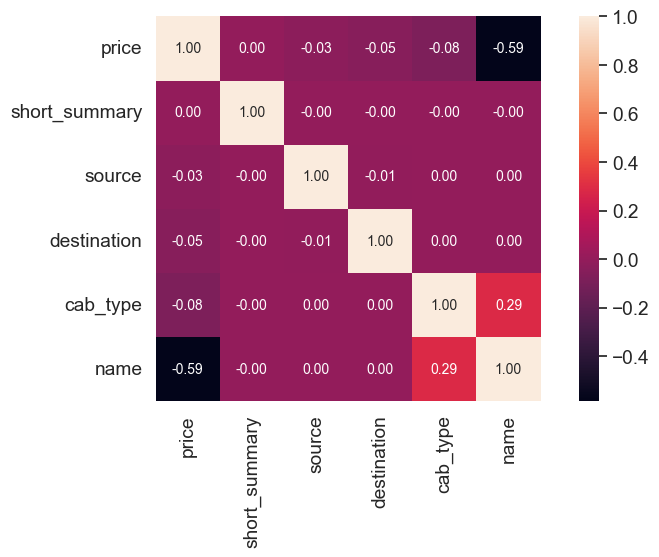

In [827]:
plt.figure(figsize=(10,5))
a = encoded_df[cat_cols].corr(numeric_only=True).nlargest(6, 'price')['price'].index
b = np.corrcoef(encoded_df[a].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(b, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=a.values, xticklabels=a.values)
plt.show()

In [828]:
encoded_df[cat_cols].corr(numeric_only = True).nlargest(6, 'price')['price']

price            1.000000
short_summary    0.001245
source          -0.025366
destination     -0.046320
cab_type        -0.083385
name            -0.586644
Name: price, dtype: float64

Heatmap menunjukkan bahwa kolom price berkorelasi negatif dengan kolom name dimana pada kolom name tertulis jenis-jenis kendaraan yang tersedia di Uber maupun Lyft

# V. Feature Engineering / Preprocessing

In [829]:
df['datetime'] = pd.to_datetime(df['datetime']) # Mengubah tipe data kembali ke datetime

In [830]:
list(df.select_dtypes('object'))

['id',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

Menyortir kolom dengan tipe data kategori/object untuk dicek cardinalitynya

In [831]:
a = df.select_dtypes('object')

In [832]:
for i in a:
    if a[i].nunique() > 0:
        print ('Jumlah kategori pada kolom', i, ':' ,a[i].nunique())

Jumlah kategori pada kolom id : 637976
Jumlah kategori pada kolom timezone : 1
Jumlah kategori pada kolom source : 12
Jumlah kategori pada kolom destination : 12
Jumlah kategori pada kolom cab_type : 2
Jumlah kategori pada kolom product_id : 12
Jumlah kategori pada kolom name : 12
Jumlah kategori pada kolom short_summary : 9
Jumlah kategori pada kolom long_summary : 11
Jumlah kategori pada kolom icon : 7


Menghitung jumlah yang unik pada setiap kolom kategori untuk dicek cardinality-nya, semua masih dalam batas normal kecuali kolom id dimana kolom id juga tidak akan terpilih menjadi salah satu fitur

In [833]:
df2 = df.iloc[:,[2,11,12,13,14]]
df2.head()

,hour,name,price,distance,surge_multiplier
0,9,Shared,5.0,0.44,1.0
1,2,Lux,11.0,0.44,1.0
2,1,Lyft,7.0,0.44,1.0
3,4,Lux Black XL,26.0,0.44,1.0
4,3,Lyft XL,9.0,0.44,1.0


- Fitur yang terpilih: hour/jam (karena menurut saya jam seharusnya berpengaruh terhadap price), jenis kendaraan/kolomn name, distance/jarak dan surge_multiplier
- Target: Price

- Cuaca tidak dimasukkan karena pada saat EDA, tidak terlihat adanya hubungan antara cuaca dengan price, begitu juga pada saat uji korelasinya dengan price
- Day/tanggal hari nya tidak dimasukkan karena pada saat EDA terlihat bahwa data yang terkumpul hanya dalam sebulan sehingga tanggal tersebut belum bisa merepresentasikan secara keseluruhan. Pada EDA juga terlihat bahwa terdapat hari yang tidak semua jam nya didata.

### Split

In [834]:
X = df2.drop('price',axis=1) #fitur
y = df2['price'] #target
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Memisahkan fitur dan target

In [1]:
#multicollinearity test
def calc_vif(A):
    vif = pd.DataFrame()
    vif["variables"] = A.columns
    vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]
    return(vif)

Function untuk menghitung VIF

In [858]:
A = df2.iloc[:,[0,3,4]]
calc_vif(A)

,variables,VIF
0,hour,3.707349
1,distance,4.613767
2,surge_multiplier,7.157940


VIF tidak melebihi 10 untuk tiap variabelnya yang berarti tidak ada / sedikit multicollinearity antar variabel

### Handling Outliers

#### Kolom Numerik

In [837]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

Function untuk buat plot distribusi dan melihat outliers

##### Kolom hour

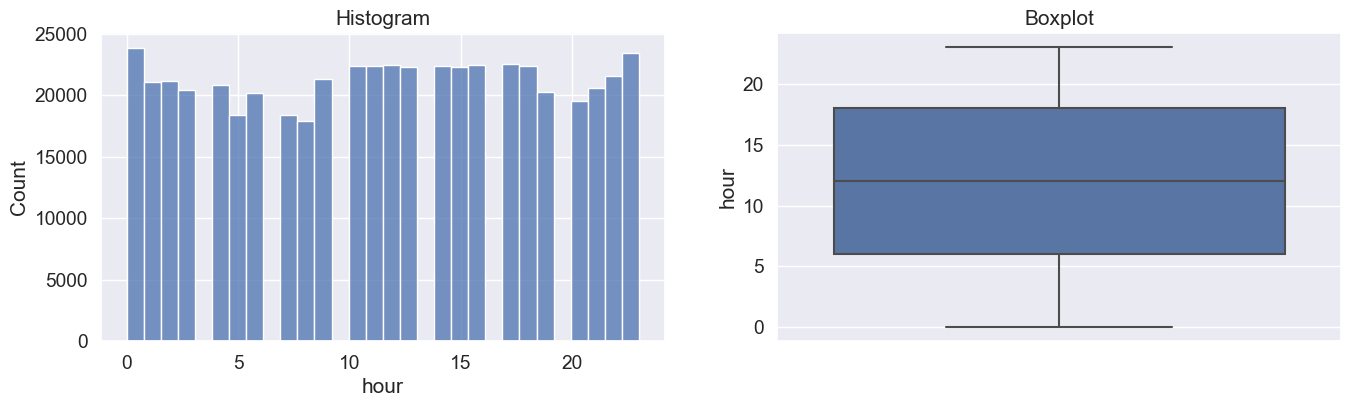


Skewness Value :  -0.04485763352174363


In [838]:
diagnostic_plots(X_train, 'hour')
print('\nSkewness Value : ', X_train['hour'].skew())

Didapatkan hasil skewness dari kolom hour dimana distribusinya uniform dan tidak terlihat adanya outliers pada plot diatas

##### Kolom distance

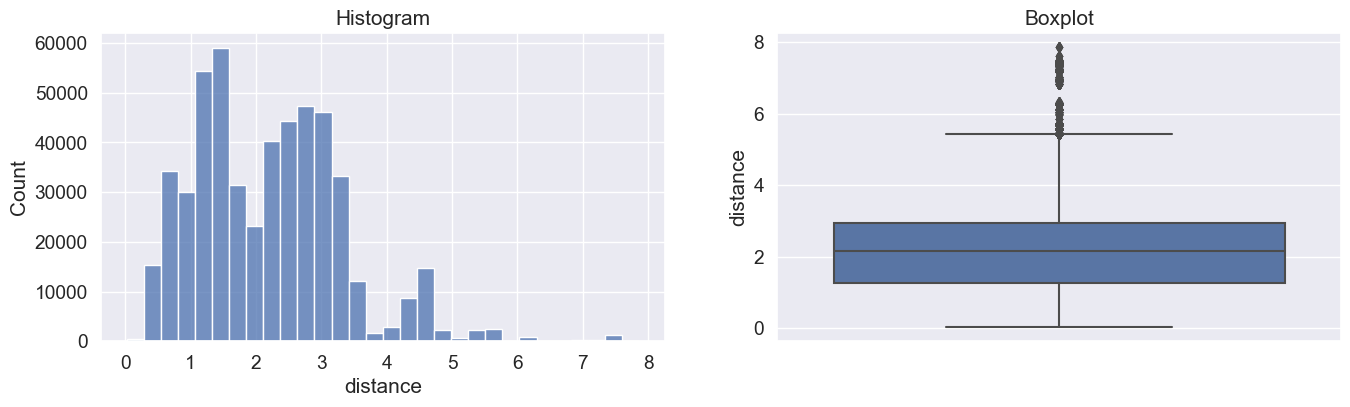


Skewness Value :  0.8180219737532629


In [839]:
diagnostic_plots(X_train, 'distance')
print('\nSkewness Value : ', X_train['distance'].skew())

Terlihat distribusi tidak normal dimana terdapat skewness 0.8180219737532629 dan terlihat adanya right-end outliers pada boxplot

In [840]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

Karena distribusi tidak normal, maka untuk handle outliers menggunakan function diatas

In [841]:
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'distance', 1.5)
upper_boundary, lower_boundary

(5.42, -1.2200000000000002)

- Didapatkan outliers diatas upper boundary = 5.42
- Didapatkan outliers dibawah lower boundary = -1.22

In [842]:
print('Outliers diatas 5.42 : {}'.format(len(X_train[X_train['distance'] > upper_boundary])))
print('Outliers dibawah -1.22  : {}'.format(len(X_train[X_train['distance'] < lower_boundary])))
print ('')
print('Persentase outliers diatas 5.42: {}'.format(len(X_train[X_train['distance'] > upper_boundary])*100/len(X_train)))
print('Persentase outliers dibawah -1.22: {}'.format(len(X_train[X_train['distance'] < lower_boundary])*100/len(X_train)))

Outliers diatas 5.42 : 5331
Outliers dibawah -1.22  : 0

Persentase outliers diatas 5.42: 1.0445158509345978
Persentase outliers dibawah -1.22: 0.0


Karena persentase outliers dibawah 5% maka outliers dihilangkan saja dengan metode Trimming

In [843]:
X_train_trimmed = X_train[~(X_train['distance']>5.42)]

outliers = X_train[(X_train['distance']>5.42)]
outliers.index

y_train_trimmed = y_train.drop(list(outliers.index),inplace=True)


Menghilangkan outliers yaitu kolom distance yang diatas 5.42 pada dataset training

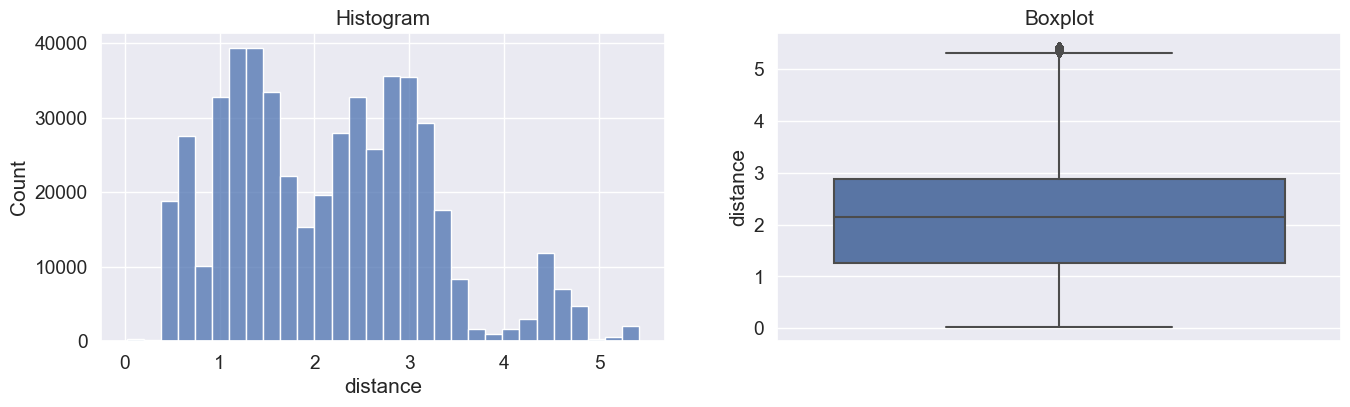


Skewness Value :  0.468471841411825


In [844]:
diagnostic_plots(X_train_trimmed, 'distance')
print('\nSkewness Value : ', X_train_trimmed['distance'].skew())

Distribusi distance menjadi normal (skewness value:  0.468471841411825) setelah dihilangkan outliersnya

In [845]:
kol_kat = X_train_trimmed.iloc[:,[1,3]].copy()
num_kat = X_train_trimmed.iloc[:,[0,2]].copy()

Membuat variabel baru untuk kolom kategori dan kolom numerikal dengan dataset yang sudah dihilangkan outliersnya

### Encoding

In [846]:
ohe_enc = OneHotEncoder(sparse_output=False)
kol_kat_name = ohe_enc.fit_transform(kol_kat[['name']])
X_test_name = ohe_enc.transform(X_test[['name']])

Encoding menggunakan One Hot Encoder untuk kolom kategori = kolom 'name' / jenis-jenis kendaraan

In [847]:
ord = OrdinalEncoder()
kol_kat_surge = ord.fit_transform(kol_kat[['surge_multiplier']])
X_test_surge = ord.transform(X_test[['surge_multiplier']])

Encoding menggunakan Ordinal Encoder untuk kolom kategori = kolom 'surge_multiplier' karena kolom tersebut ada ranking nya dimana untuk kolom yang berisi angka '1' akan diencode menjadi '0' , dan seterusnya

### Scaling

In [848]:
ss = StandardScaler()
num_kat_scaled = ss.fit_transform(num_kat)
X_test_scaled = ss.transform(X_test[['hour','distance']])

Scaling menggunakan Standard Scaler karena distribusi normal pada kolom numerikal (kolom 'hour' dan kolom 'distance')

# VI. Model Definition

In [849]:
X_train_final= np.concatenate([kol_kat_name,kol_kat_surge,num_kat_scaled],axis=1)
X_test_final= np.concatenate([X_test_name,X_test_surge,X_test_scaled],axis=1)

Menggabungkan terlebih dahulu kolom-kolom yang sudah diencode dan discaling (kolom fitur yang telah terpilih)

In [850]:
model = LinearRegression()
model.fit(X_train_final,y_train)

LinearRegression()

In [851]:
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)

Model yang dipilih adalah Linear Regression karena target berupa numerik

# VII. Model Evaluation

In [852]:
print("MAE Train:",mean_absolute_error(y_train,y_pred_train))
print("MAE Test:",mean_absolute_error(y_test,y_pred_test))
print("RMSE Train:",mean_squared_error(y_train,y_pred_train,squared=False))
print("RMSE Test:",mean_squared_error(y_test,y_pred_test,squared=False))
print("R2 Score Train:",r2_score(y_train,y_pred_train))
print("R2 Score Test:",r2_score(y_test,y_pred_test))
print('Mean Absolute Percentage Error Train:', mean_absolute_percentage_error(y_train,y_pred_train))
print('Mean Absolute Percentage Error Test:', mean_absolute_percentage_error(y_test,y_pred_test))

MAE Train: 1.7427324836109652
MAE Test: 1.7797103239102081
RMSE Train: 2.442495797929704
RMSE Test: 2.513732974498738
R2 Score Train: 0.9299249311879523
R2 Score Test: 0.9275198114581467
Mean Absolute Percentage Error Train: 0.1344908039430402
Mean Absolute Percentage Error Test: 0.1359261233581574


In [853]:
df2.price.mean()

16.545125490614065

- Mean Absolute Error (MAE) diatas menandakan bahwa setiap data baru yang masuk bisa memiliki error plus minus 1.7 dollar, dimana angka ini tergolong cukup rendah apabila dibandingkan dengan rata-rata keseluruhan yaitu 16.5 dollar

- R2 score diatas menandakan bahwa 93% variabel yang kita pilih mempengaruhi prediksi/target yang dicari

# VIII. Model Saving

In [854]:
with open('model_linreg.pkl','wb') as file_1:
  joblib.dump(model, file_1)

with open('model_standardscaler.pkl','wb') as file_2:
  joblib.dump(ss, file_2)

with open('model_onehotencoder.pkl','wb') as file_3:
  joblib.dump(ohe_enc,file_3)

with open('model_ordinalencoder.pkl','wb') as file_4:
  joblib.dump(ord,file_4)

Menyimpan model, encoder dan scaler yang digunakan

# X. Kesimpulan

Dibutuhkan beberapa variabel atau fitur untuk menghitung target dimana pada kasus ini yang ingin dicari tahu yaitu harga dari penggunaan taksi online Uber ataupun Lyft. Dalam kasus ini ada beberapa fitur yang dipilih antara lain: jarak tempuhnya (distance), jenis kendaraan yang tersedia di Uber dan Lyft, jam agar tahu kapan saja orang-orang memesan taksi online dan surge multiplier dimana makin tinggi surge multipliernya, semakin mahal juga harganya.
Untuk model yang digunakan pada kasus ini adalah model linear regression karena output yang dihasilkan berupa numerikal (price/harga) dan setelah dievaluasi didapatkan bahwa 93% fitur-fitur yang dipilih sudah bisa digunakan untuk memprediksi harga. Oleh karena itu, model ini bisa digunakan dalam kasus ini.

### Conceptual Problems

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

2. Tunjukkan dan tafsirkan arti dari intercept dan slope yang didapat dari model yang telah Anda bangun !

### Jawaban

1. Linear Regression digunakan apabila ingin mengetahui / memprediksi nilai data yang belum diketahui dari nilai-nilai data yang terkait dan telah diketahui.
Asumsi:
- Hubungan harus linear
- Sedikit / tidak ada multicollinearity dimana artinya tidak boleh ada hubungan antara satu variabel dengan variabel lainnya / antar variabel harus independent
- Multivariate normality / sebisa mungkin distribusi normal (karena apabila ada outliers, garisnya akan dipengaruhi oleh outliersnya sehingga errornya bisa makin besar)
- Sedikit / tidak ada autocorrelation dimana artinya tidak boleh ada hubungan antara serial data / antara data sebelum dengan data sesudah dalam data yang disusun berdasarkan runtun waktu atau time series
- Homoskedastisitas adalah dimana kondisi data ketika nilai residu pada tiap nilai prediksi bervariasi dan variasinya cenderung konstan


2. Slope / Weight / Coefficient merupakan suatu nilai yang menunjukkan seberapa besar kontribusi yang diberikan suatu variabel X terhadap variabel Y, jadi semakin besar nilai slope maka semakin penting variabel tersebut terhadap prediksi targetnya. Sedangkan intercept adalah nilai rata-rata pada variabel Y apabila nilai pada variabel X bernilai 0. Dengan kata lain, apabila X tidak memberikan kontribusi, maka secara rata-rata, variabel Y akan bernilai sebesar intercept.